In [8]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import emoji
import seaborn as sns

In [9]:
df = pd.read_csv("Data/cleaned_by_language.csv")

In [10]:
en_df = df[df['language'] == 'en']
es_df = df[df['language'] == 'es']

## Create Corpus

In [11]:
en_corpus = en_df['text'].tolist()
es_corpus = es_df['text'].tolist()

## Create Emoji Set

In [12]:
emoji_list = df['emoji list'].tolist()

emoji_list = list(itertools.chain.from_iterable(emoji_list))
delete = {"'","\"", " ", "[", "]", ",", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "\\", "a", "e", "f", "U"}
new_emoji_list = []

for ele in emoji_list:
    if ele not in delete:
        new_emoji_list.append(ele)
        
emoji_set = set(new_emoji_list)

## TF-IDF for English Comments: 
### TF(emoji, comment) = (Number of times the emoji appears in the comment) / (Total number of emojis in the comment)

In [14]:
# tf: emoji occurance / word count+emoji count
en_docs = len(en_corpus)         #·Number of comments in the corpus
n_emoji_set = len(emoji_set) #·Number of unique emoji in the comment

en_word = en_df['word count'].tolist()
en_emoji = en_df['emoji count'].tolist()
en_counts = [en_word[i] + en_emoji[i] for i in range(len(en_word))] # Number of word_emoji count in the comment

en_emoji_list = en_df['emoji list'].tolist()
 
en_df_tf = pd.DataFrame(np.zeros((en_docs, n_emoji_set)), columns=list(emoji_set))
 
# Compute Term Frequency (TF)
for i in range(en_docs):
    for e in en_emoji_list[i]:
        if e not in emoji_set:
            continue
        en_df_tf[e][i] = en_df_tf[e][i] + (1 / (en_emoji[i]))
         
en_df_tf
# en_df_tf['😂'].head(20)

,🏼,♥,🥅,☺,😮,❤,🤍,🏿,🎉,🐢,...,🤭,🥶,💚,💙,💰,⭐,🗑,😁,🙆,🌎
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### IDF(emoji, corpus) = log(Total number of comments in the corpus / Number of comments containing the emoji)

In [15]:
#idf
en_idf = {}
 
for w in emoji_set:
    k = 0    # number of documents in the corpus that contain this word
     
    for i in range(en_docs):
        if w in en_emoji_list[i]:
            k += 1
             
    en_idf[w] =  np.log10(en_docs / (k + 1)) # k+1 to avoid division by 0
     
    print(f'{w:>15}: {en_idf[w]:>10}' )

              🏼: 1.7481880270062005
              ♥: 1.9700367766225568
              🥅: 2.4471580313422194
              ☺: 2.146128035678238
              😮: 1.7481880270062005
              ❤: 0.9420080530223133
              🤍: 2.4471580313422194
              🏿: 2.4471580313422194
              🎉: 2.146128035678238
              🐢: 2.146128035678238
              😵: 2.4471580313422194
              👁: 2.4471580313422194
              🔵: 2.4471580313422194
              🟡: 2.4471580313422194
              🤷: 1.9700367766225568
              👑: 2.4471580313422194
              🤣: 1.3010299956639813
              🤬: 2.146128035678238
              🙌: 1.405765346183994
              🥂: 2.4471580313422194
              ☹: 2.4471580313422194
              🏻: 1.6690067809585756
              💛: 1.9700367766225568
              ✅: 2.146128035678238
              🤙: 2.4471580313422194
              😡: 1.9700367766225568
              🩹: 2.146128035678238
              ⏱: 2.4471580313422194

In [16]:
# compute TF-idf
en_df_tf_idf = en_df_tf.copy()
 
for w in emoji_set:
    for i in range(en_docs):
        en_df_tf_idf[w][i] = en_df_tf[w][i] * en_idf[w]
         
en_df_tf_idf

,🏼,♥,🥅,☺,😮,❤,🤍,🏿,🎉,🐢,...,🤭,🥶,💚,💙,💰,⭐,🗑,😁,🙆,🌎
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.314003,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.615033,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.073064,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


## TF-IDF for Spanish Comments: 

In [18]:
# tf: emoji occurance / word count+emoji count
es_docs = len(es_corpus)         #·Number of comments in the corpus
n_emoji_set = len(emoji_set) #·Number of unique emoji in the comment

es_word = es_df['word count'].tolist()
es_emoji = es_df['emoji count'].tolist()
es_counts = [es_word[i] + es_emoji[i] for i in range(len(es_word))] # Number of word_emoji count in the comment

es_emoji_list = es_df['emoji list'].tolist()
 
es_df_tf = pd.DataFrame(np.zeros((es_docs, n_emoji_set)), columns=list(emoji_set))
 
# Compute Term Frequency (TF)
for i in range(es_docs):
    for e in es_emoji_list[i]:
        if e not in emoji_set:
            continue
        es_df_tf[e][i] = es_df_tf[e][i] + (1 / es_emoji[i])
         
es_df_tf

,🏼,♥,🥅,☺,😮,❤,🤍,🏿,🎉,🐢,...,🤭,🥶,💚,💙,💰,⭐,🗑,😁,🙆,🌎
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#idf
es_idf = {}
 
for w in emoji_set:
    k = 0    # number of documents in the corpus that contain this word
     
    for i in range(es_docs):
        if w in es_emoji_list[i]:
            k += 1
             
    es_idf[w] =  np.log10(es_docs / (k + 1)) # k+1 to avoid division by 0
     
    print(f'{w:>15}: {es_idf[w]:>10}' )

              🏼: 1.3332146790353825
              ♥: 2.4471580313422194
              🥅: 2.146128035678238
              ☺: 2.146128035678238
              😮: 1.9700367766225568
              ❤: 0.85609342431572
              🤍: 1.845098040014257
              🏿: 2.146128035678238
              🎉: 2.4471580313422194
              🐢: 2.4471580313422194
              😵: 2.146128035678238
              👁: 2.146128035678238
              🔵: 2.146128035678238
              🟡: 2.146128035678238
              🤷: 1.7481880270062005
              👑: 1.9700367766225568
              🤣: 1.5440680443502757
              🤬: 2.146128035678238
              🙌: 1.0321846833714012
              🥂: 2.146128035678238
              ☹: 2.146128035678238
              🏻: 1.405765346183994
              💛: 2.146128035678238
              ✅: 2.4471580313422194
              🤙: 2.146128035678238
              😡: 2.146128035678238
              🩹: 2.146128035678238
              ⏱: 2.146128035678238
           

In [20]:
# compute TF-idf
es_df_tf_idf = es_df_tf.copy()
 
for w in emoji_set:
    for i in range(es_docs):
        es_df_tf_idf[w][i] = es_df_tf[w][i] * es_idf[w]
         
es_df_tf_idf

,🏼,♥,🥅,☺,😮,❤,🤍,🏿,🎉,🐢,...,🤭,🥶,💚,💙,💰,⭐,🗑,😁,🙆,🌎
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.856093,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.285364,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.000000,0.922549,0.0,0.0,0.0,...,0.0,0.0,0.0,0.834503,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Comparison: Summing the TF-IDF scores to understand the overall importance of emojis within a group of comments, rather than at the individual comment level. 

In [21]:
en_sums = en_df_tf_idf.sum()

top_20_en = en_sums.sort_values(ascending=False).head(20)

print("Top 20 TF-IDF in English:")
print(top_20_en)

Top 20 TF-IDF in English:
😂    39.030154
🔥    20.319356
👏    19.826051
❤    18.133655
🤣    15.240637
💀    15.047745
😍    14.391775
😢    10.201589
🙌     9.348340
💯     5.827293
👎     5.535294
🙏     4.806180
⚽     4.806180
😅     4.612745
🥱     4.305229
🙄     4.300902
😭     3.940074
🦁     3.940074
😡     3.940074
♥     3.940074
dtype: float64


In [22]:
es_sums = es_df_tf_idf.sum()

top_20_es = es_sums.sort_values(ascending=False).head(20)

print("Top 20 TF-IDF in Spanish:")
print(top_20_es)

Top 20 TF-IDF in Spanish:
😂    38.891444
🔥    23.852797
❤    21.669541
👏    18.628476
😍    17.044313
🙌    15.880899
😢    13.354771
😭     6.433617
🤣     5.970396
🏼     5.367776
💙     5.205712
😎     4.661835
🙏     4.506318
🏻     4.381302
🏆     3.234148
⚽     3.097316
👑     2.955055
✌     2.955055
🤫     2.955055
♂     2.803605
dtype: float64


/Users/aorawancraprayoon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aorawancraprayoon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aorawancraprayoon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aorawancraprayoon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127999 (\N{EMOJI MODIFIER FITZPATRICK TYPE-6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aorawancraprayoon/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127881 (

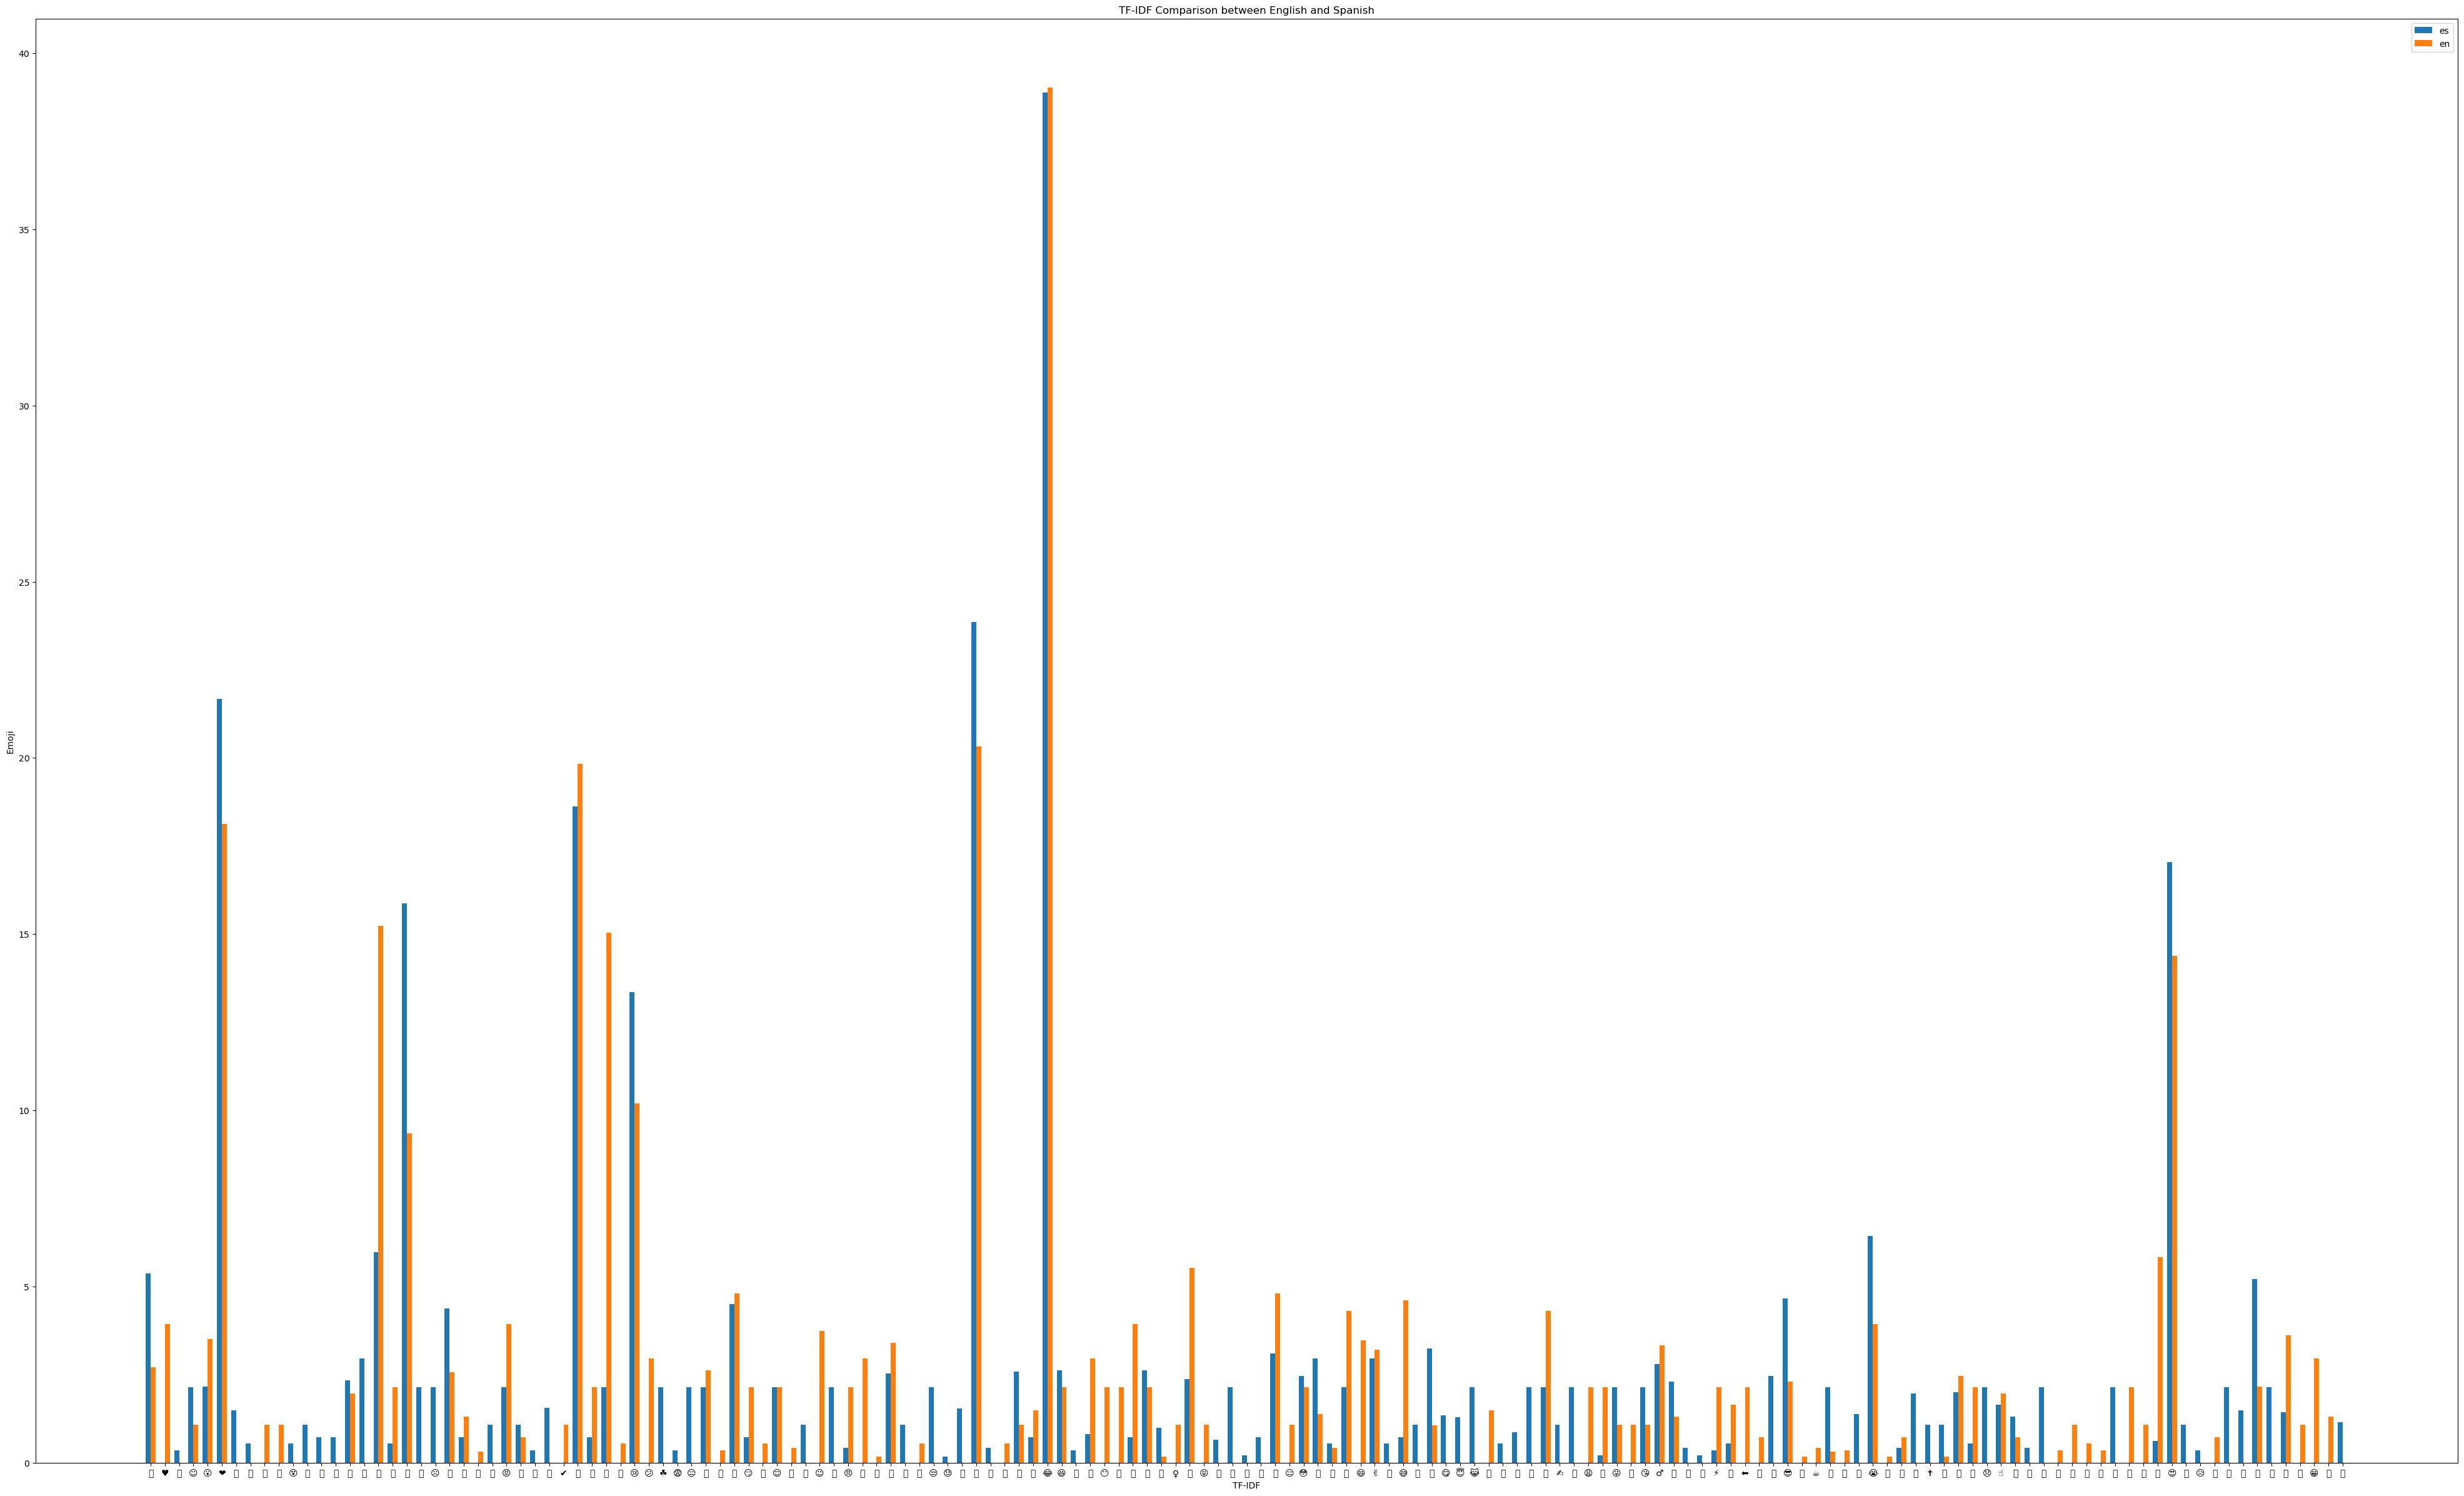

In [23]:
# Set the width of each bar
bar_width = 0.35

# Calculate the x-axis positions for each variable
x = np.arange(len(es_sums.index))


fig, ax = plt.subplots(figsize=(50, 30)) 
ax.bar(x - bar_width / 2, es_sums, bar_width, label='es', align='center')
ax.bar(x + bar_width / 2, en_sums, bar_width, label='en', align='center')

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(es_sums.index)

# Add labels, legend, and title
ax.set_xlabel('TF-IDF')
ax.set_ylabel('Emoji')
ax.set_title('TF-IDF Comparison between English and Spanish')
ax.legend()

# Show the plot
plt.show()

In [24]:
# es > en
for i in range(len(es_sums)):
    if es_sums[i] - en_sums[i] > 5:
        print(es_sums.index.tolist()[i])

🙌


In [25]:
# en > es
for i in range(len(es_sums)):
    if en_sums[i] - es_sums[i] > 5:
        print(es_sums.index.tolist()[i])

🤣
💀
💯


## 🐐 Goat has different meanings between two languages

In [26]:
es_sums.index.tolist().index('🐐')

28

In [27]:
en_sums[119]

0.357688005946373

In [28]:
es_sums[119]

0.0

In [29]:
es_sums.index.tolist().index('💙')

148

In [30]:
en_sums[95]

0.0

In [31]:
es_sums[95]

0.5365320089195595

In [33]:
en_df_tf_idf

,🏼,♥,🥅,☺,😮,❤,🤍,🏿,🎉,🐢,...,🤭,🥶,💚,💙,💰,⭐,🗑,😁,🙆,🌎
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.314003,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.615033,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.073064,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
276,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
278,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


## Histogram for TF-IDF

/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1708564187.py:14: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1708564187.py:14: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1708564187.py:14: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1708564187.py:14: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1708564187.py:14: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1708564187.py:14: 

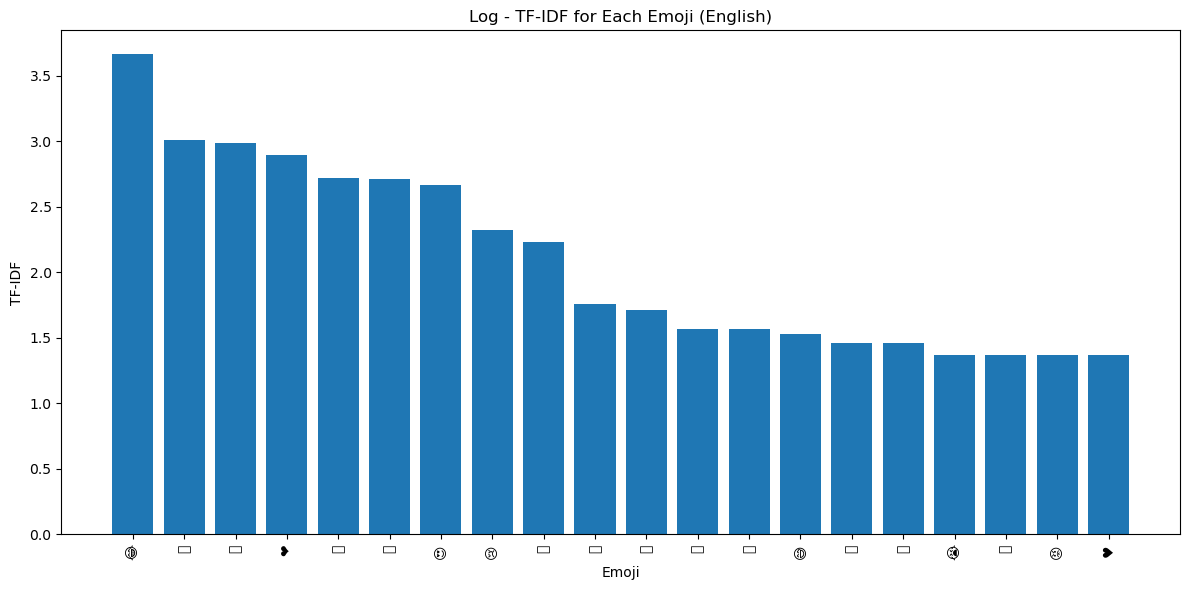

Index(['😂', '🔥', '👏', '❤', '🤣', '💀', '😍', '😢', '🙌', '💯', '👎', '🙏', '⚽', '😅',
       '🥱', '🙄', '😭', '🦁', '😡', '♥'],
      dtype='object')

In [56]:
en_tfidf_20 = en_sums.sort_values(ascending=False)[:20]
en_emojis = en_tfidf_20.index
en_emojis_tfidf = en_tfidf_20.values
log_en_tfidf = np.log(en_emojis_tfidf)


plt.figure(figsize=(12, 6))
plt.bar(en_emojis, log_en_tfidf)
plt.xlabel('Emoji')
# plt.yscale('log')
plt.ylabel('TF-IDF')
plt.title('Log - TF-IDF for Each Emoji (English)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
en_emojis

/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/3513286160.py:14: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/3513286160.py:14: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/3513286160.py:14: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/3513286160.py:14: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/3513286160.py:14: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipyker

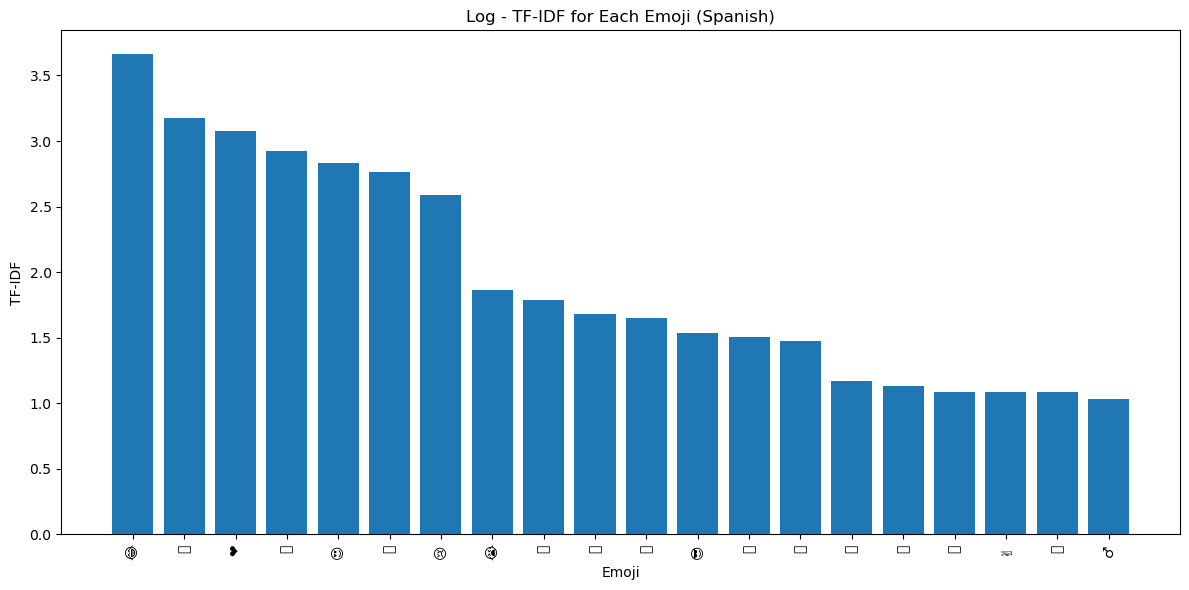

Index(['😂', '🔥', '❤', '👏', '😍', '🙌', '😢', '😭', '🤣', '🏼', '💙', '😎', '🙏', '🏻',
       '🏆', '⚽', '👑', '✌', '🤫', '♂'],
      dtype='object')

In [55]:
es_tfidf_20 = es_sums.sort_values(ascending=False)[:20]
es_emojis = es_tfidf_20.index
es_emojis_tfidf = es_tfidf_20.values
log_es_tfidf = np.log(es_emojis_tfidf)


plt.figure(figsize=(12, 6))
plt.bar(es_emojis, log_es_tfidf)
plt.xlabel('Emoji')
# plt.yscale('log')
plt.ylabel('TF-IDF')
plt.title('Log - TF-IDF for Each Emoji (Spanish)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
es_emojis

/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1667355345.py:25: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1667355345.py:25: UserWarning: Glyph 128175 (\N{HUNDRED POINTS SYMBOL}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1667355345.py:25: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1667355345.py:25: UserWarning: Glyph 129393 (\N{YAWNING FACE}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1667355345.py:25: UserWarning: Glyph 128580 (\N{FACE WITH ROLLING EYES}) missing from current font.
  plt.tight_layout()
/var/folders/0g/cxzyrs9n0jxb88pnh_5r5wdr0000gn/T/ipykernel_19089/1667355345.py:25: UserWarning: Glyph 12

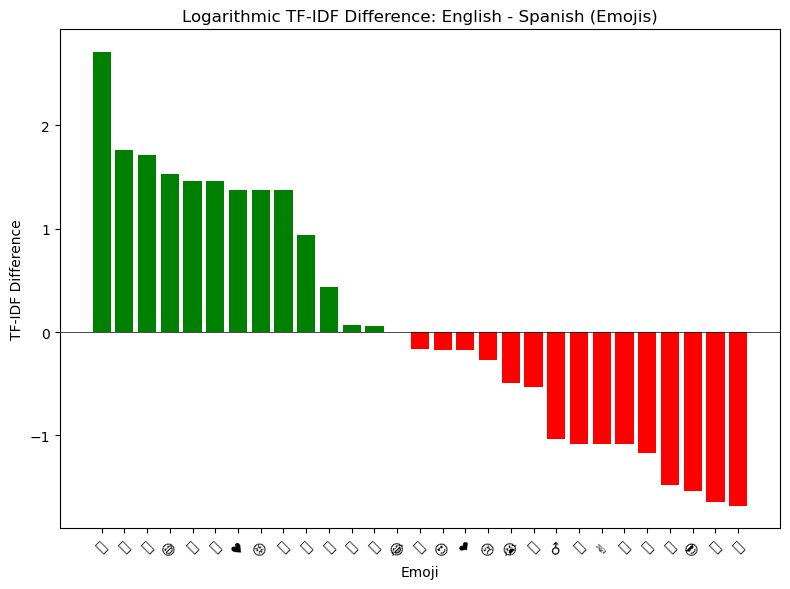

5     💀
9     💯
10    👎
13    😅
14    🥱
15    🙄
19    ♥
18    😡
17    🦁
4     🤣
12    ⚽
11    🙏
2     👏
0     😂
1     🔥
6     😍
3     ❤
7     😢
16    😭
8     🙌
28    ♂
25    👑
26    ✌
27    🤫
24    🏆
23    🏻
22    😎
21    💙
20    🏼
Name: Emoji, dtype: object

In [57]:
# Get the unique union of emojis from both data frames
emojis_union = sorted(set(es_tfidf_20.index) | set(en_tfidf_20.index))

# Create DataFrames from the data
en_df = pd.DataFrame({'Emoji': en_tfidf_20.index, 'TF-IDF (English)': np.log(en_tfidf_20.values)})
es_df = pd.DataFrame({'Emoji': es_tfidf_20.index, 'TF-IDF (Spanish)': np.log(es_tfidf_20.values)})

# Merge DataFrames on 'Emoji' to ensure data alignment
merged_df = pd.merge(en_df, es_df, on='Emoji', how='outer')
merged_df = merged_df.fillna(0) 

merged_df['TF-IDF Difference'] = merged_df['TF-IDF (English)'].sub(merged_df['TF-IDF (Spanish)'], axis = 0) 
merged_df = merged_df.sort_values(by='TF-IDF Difference', ascending=False)
merged_df


# Create a bar chart on Max Repetition Difference
plt.figure(figsize=(8, 6))
plt.bar(merged_df['Emoji'], merged_df['TF-IDF Difference'], color=['g' if x >= 0 else 'r' for x in merged_df['TF-IDF Difference']])
plt.xlabel('Emoji')
plt.ylabel('TF-IDF Difference')
plt.title("Logarithmic TF-IDF Difference: English - Spanish (Emojis)")
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal line at y=0
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()
merged_df['Emoji']